In [2]:
# # Fetch data from Most Popular Section of NYT API using requests

# import requests
# import json 
# import os

# try:
#     os.chdir('C:/Users/Dhaval/Python_Data/bhinde_dhaval_spring2017/')
# except:
#     pass

# base_url = "https://api.nytimes.com/svc/mostpopular/v2/mostshared/Travel/30.json"
# key = 'd6a6c22e607c430bbc79428541bcb0ff'

# url = base_url+'?'+'&api-key='+key
# r = requests.get(url)
# data = r.json()
# json.dump(data,open("midterm\\data\\Question2\\travel\\travel_0306.json",'w'))

In [2]:
# Read JSON Data

import os
import os.path
import glob
import json
from dateutil.parser import parse

try:
    os.chdir('C:/Users/Dhaval/Python_Data/bhinde_dhaval_spring2017/')
except:
    pass

raw_data_lead=[]
article_count = {}

file_list = glob.glob("midterm\\data\\Question2\\travel\\*.json")


data = []
for js in file_list:
    with open(js) as f:
        for line in f:
            data.append(json.loads(line))


    for j in range(len(data)):
        for k in range(len((data[j]['response']['docs']))):
            raw_lead = (data[j]['response']['docs'][k]['lead_paragraph'])
            raw_date = (data[j]['response']['docs'][k]['pub_date'])
            try:
                raw_data_lead.append(raw_lead.lower())
                dt = parse(raw_date)
                clean_mmyy=(dt.strftime('%Y'))
                if clean_mmyy not in article_count:
                    article_count[clean_mmyy] = 1
                else: article_count[clean_mmyy]+=1
            except:
                pass
            
print('Execution Complete!')

Execution Complete!


In [6]:
# Data cleaning

import re
regex = re.compile("[^a-zA-Z\s.]")

lead_clean = []
for x in raw_data_lead:
    lead_clean.append(regex.sub('', x))  # Regex to clean the corpus   
    
   

In [36]:
# Tokenize words
import re
import nltk
reg = re.compile("[^a-zA-Z\s]")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

stop_words = set(stopwords.words("english"))
fin_lead = ''.join(lead_clean)

tokens2 = nltk.word_tokenize(fin_lead)
wnl = nltk.WordNetLemmatizer()
lem_lead = [wnl.lemmatize(t) for t in tokens2]

lem_lead_clean=[]
for x in lem_lead:
    lem_lead_clean.append(reg.sub('', x))  # Regex to clean the corpus 

lem_lead_clean2 = [x for x in lem_lead_clean if x]
filtered_lead = [w for w in lem_lead_clean2 if not w in stop_words]


In [8]:
dict_travel = {}

for x in filtered_lead:
    if x not in dict_travel:
        dict_travel[x] = 1
    else: dict_travel[x]+=1

In [39]:
city_file = open("midterm\\data\\Question2\\cities.txt",encoding="utf8").read()
city_cat = city_file.split('\n')

city_dict_clean = {}
for x in dict_travel:
    if x in city_cat:
        city_dict_clean[x] = dict_travel.get(x)

v1 = [v[0] for v in sorted(city_dict_clean.items(), key=lambda x:x[1],reverse=True)]
v2 = [v[1] for v in sorted(city_dict_clean.items(), key=lambda x:x[1],reverse=True)]


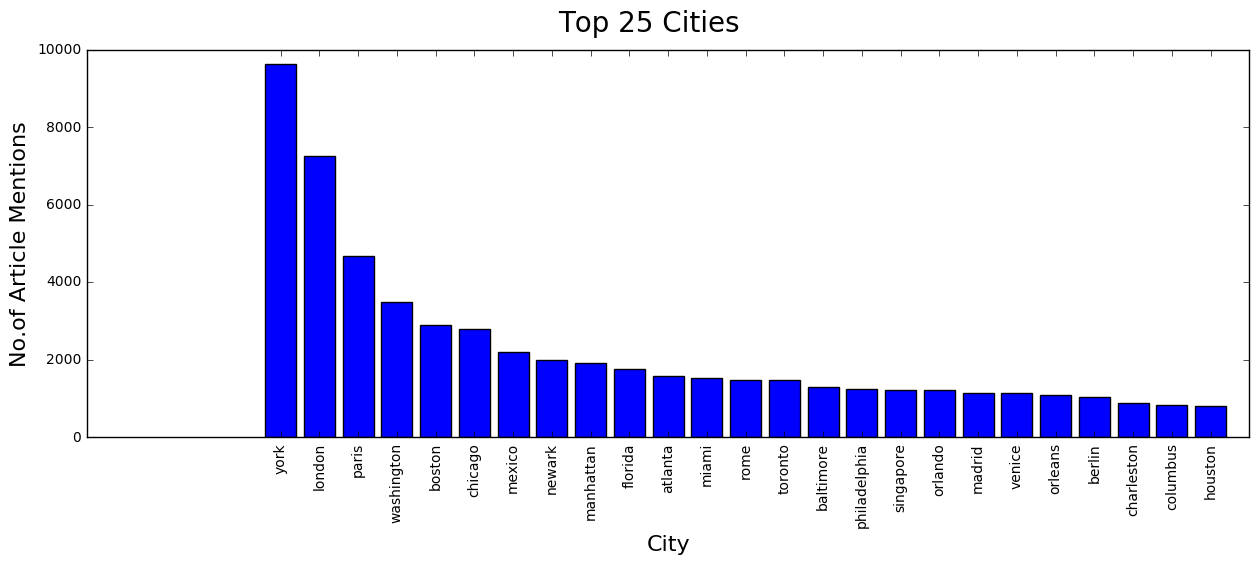

In [40]:

import matplotlib.pyplot as plt

v2 = [v[0] for v in sorted(city_dict_clean.items(), key=lambda x:x[1],reverse=True)[:25]]
v1 = [v[1] for v in sorted(city_dict_clean.items(), key=lambda x:x[1],reverse=True)[:25]]

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

fig = plt.figure()
fig.suptitle('Top 25 Cities', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('No.of Article Mentions', fontsize=16)
plt.bar(range(len(v1)), v1, align='center')
plt.xticks(range(len(v2)), v2,rotation='vertical')

plt.show()